In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


In [2]:
df_regl = regl_cv()
print(len(df_regl))

df_regl['atac_flank_rev'] = df_regl['start'] - 50 
df_regl['atac_flank_fwd'] = df_regl['end'] + 50

COLS_FLANK = ['chrom', 'atac_flank_rev', 'atac_flank_fwd']
df_regl.head()

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


13086 of 42245 sites with CV values via promoter annotation
42245


,chrom,start,end,annot,annot_fwd,annot_rev,promoter_gene_id_fwd,promoter_locus_id_fwd,promoter_gene_biotype_fwd,promoter_gene_id_rev,...,lcap_incr_glp1_d7_fwd,lcap_incr_glp1_d7_rev,lcap_incr_glp1_d10_fwd,lcap_incr_glp1_d10_rev,lcap_incr_glp1_d14_fwd,lcap_incr_glp1_d14_rev,CV,CV_rank,atac_flank_rev,atac_flank_fwd
0,chrI,1870,2092,putative_enhancer,transcription_initiation,transcription_initiation,.,.,.,.,...,False,False,False,False,False,False,NaN,NaN,1820,2142
1,chrI,3809,3994,non-coding_RNA,unknown_promoter,non-coding_RNA,.,.,.,WBGene00023193,...,False,False,False,True,False,True,NaN,NaN,3759,4044
2,chrI,4302,4410,putative_enhancer,transcription_initiation,transcription_initiation,.,.,.,.,...,False,False,False,False,False,False,NaN,NaN,4252,4460
3,chrI,11245,11465,coding_promoter,coding_promoter,transcription_initiation,WBGene00022276,nlp-40,protein_coding,.,...,False,False,False,False,False,False,0.517,0.618562,11195,11515
4,chrI,13087,13207,putative_enhancer,transcription_initiation,transcription_initiation,.,.,.,.,...,False,False,False,False,False,False,NaN,NaN,13037,13257


In [3]:
#fp_ = 'http://genome.cshlp.org/content/suppl/2014/04/24/gr.161992.113.DC1/Supplemental_Information_S1.zip'
#!cd ~/relmapping/wget; wget -m --no-parent {fp_}
fp_ = 'wget/genome.cshlp.org/content/suppl/2014/04/24/gr.161992.113.DC1/S01 Information of TF overlap worm_ce10.csv'
df_ = pd.read_csv(fp_)
print('%d records in S1' % (len(df_),))
df_.head(5)

35062 records in S1


,Unnamed: 0,N_of_factors_bound,N_of_factors_in_core,chromosome,core_start,core_stop,core_mid,extended_start,extended_stop,ChIPseq_data_core_summary,ChIPseq_data_ext_summary
0,7079,87,86,chrII,5844805,5844808,5844806,5844301,5845398,EGL-5;W03F9.2;PAX-1;CEH-39;NHR-2;FKH-10;NHR-67...,EGL-5;EOR-1;W03F9.2;PAX-1;CEH-39;NHR-2;FKH-10;...
1,23326,86,77,chrV,6224694,6224698,6224696,6220642,6230087,EGL-5;EOR-1;W03F9.2;PAX-1;CEH-39;NHR-2;FKH-10;...,EGL-5;EOR-1;W03F9.2;PAX-1;CEH-39;NHR-2;FKH-10;...
2,30454,86,86,chrX,6296505,6296509,6296507,6296008,6297099,EGL-5;W03F9.2;PAX-1;CEH-39;NHR-2;FKH-10;NHR-67...,EGL-5;W03F9.2;PAX-1;CEH-39;NHR-2;FKH-10;NHR-67...
3,32390,86,86,chrX,11094147,11094171,11094159,11093630,11094622,EGL-5;W03F9.2;PAX-1;CEH-39;NHR-2;FKH-10;NHR-67...,EGL-5;W03F9.2;PAX-1;CEH-39;NHR-2;FKH-10;NHR-67...
4,33766,86,86,chrX,14525863,14525881,14525872,14525230,14526451,EGL-5;EOR-1;W03F9.2;PAX-1;CEH-39;NHR-2;FKH-10;...,EGL-5;EOR-1;W03F9.2;PAX-1;CEH-39;NHR-2;FKH-10;...


In [4]:
df_core = df_[['chromosome', 'core_start', 'core_stop']]
df_core.columns = ['chrom', 'start', 'end']
df_core.head(5)

,chrom,start,end
0,chrII,5844805,5844808
1,chrV,6224694,6224698
2,chrX,6296505,6296509
3,chrX,11094147,11094171
4,chrX,14525863,14525881


In [5]:
df_extd = df_[['chromosome', 'extended_start', 'extended_stop']]
df_extd.columns = ['chrom', 'start', 'end']
df_extd.head(5)

,chrom,start,end
0,chrII,5844301,5845398
1,chrV,6220642,6230087
2,chrX,6296008,6297099
3,chrX,11093630,11094622
4,chrX,14525230,14526451


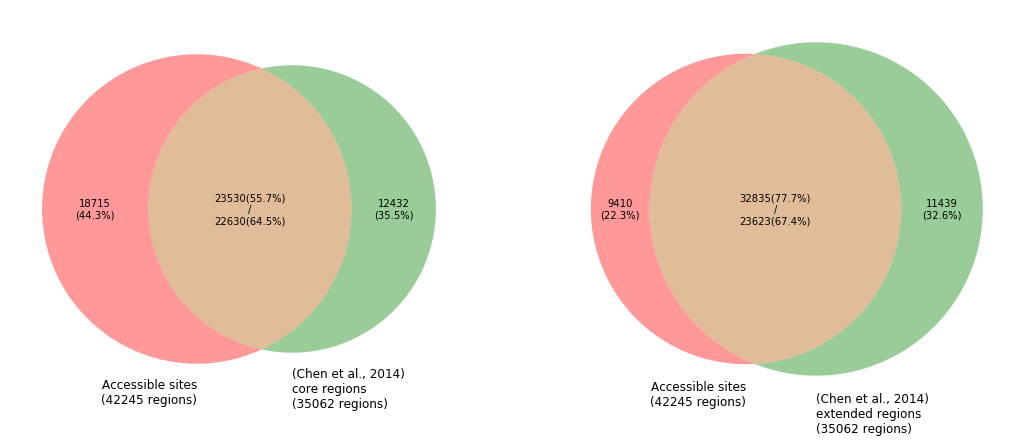

In [8]:
gv = yp.GenomicVenn2(
    BedTool.from_dataframe(df_regl[COLS_FLANK + ['annot']]),
    BedTool.from_dataframe(df_core),
    label_a='Accessible sites',
    label_b='(Chen et al., 2014)\ncore regions',
)

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
gv.plot()

plt.subplot(1,2,2)
gv = yp.GenomicVenn2(
    BedTool.from_dataframe(df_regl[COLS_FLANK + ['annot']]),
    BedTool.from_dataframe(df_extd),
    label_a='Accessible sites',
    label_b='(Chen et al., 2014)\nextended regions',
)
gv.plot()
plt.savefig('annot/FigA_overlaps/overlaps_Chen2014_TFs.pdf', bbox_inches='tight')